### settings & setup

In [1]:
import fasttext
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sklearn
from sklearn.metrics import *
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns; sns.set()
print(sklearn.__version__)


0.22


In [3]:
WORD_VECTORS = "./word_vectors"
MODEL_TARGET = os.path.abspath(os.path.join(WORD_VECTORS, 'train_500000.bin'))

print(MODEL_TARGET)

/Users/labdalla/Documents/Scratch-MEng/Workspace/supervised-learning/scratch-recommend/scratch-vectorize/word_vectors/train_500000.bin


### visualize embeddings

In [4]:
model = fasttext.load_model(MODEL_TARGET)

In [5]:
model['motion_turnright']

array([ 0.07661133, -0.21899197,  0.05923463, -0.19274239,  0.36185098,
       -0.01490204,  0.31326857, -0.15564577, -0.03452372, -0.04014336,
        0.17606167,  0.12581219, -0.08768213,  0.13646033, -0.16349809,
       -0.10217518, -0.19393645,  0.16846594,  0.38545442,  0.41580352,
        0.1394653 , -0.03271231,  0.14980942,  0.3068345 ,  0.27090755,
       -0.36482832, -0.00872882, -0.15615885,  0.5085553 ,  0.02069114,
       -0.07501715, -0.26484707, -0.10638502, -0.19239545, -0.18005562,
        0.05231786, -0.20690441,  0.4787158 ,  0.02804943,  0.18971577,
        0.01125405, -0.16470261,  0.21484017, -0.28493914,  0.10406634,
       -0.32433596,  0.07725228, -0.3345698 ,  0.20945628,  0.19499257,
        0.07461384,  0.19050792,  0.04713694,  0.13955837,  0.47460324,
        0.13744396, -0.25228277, -0.24611297, -0.42012435, -0.13661638,
        0.15661351,  0.28216693,  0.47307637,  0.46028164,  0.0304264 ,
        0.15028477, -0.10427093,  0.01644554,  0.00264177,  0.03

In [8]:
model['motion_turnleft']

array([ 0.13997957, -0.32085788,  0.26751712, -0.2749354 ,  0.20241424,
        0.1233284 ,  0.19826554, -0.10874201, -0.11394028, -0.03874404,
        0.02799118,  0.07100742, -0.19128814,  0.13575374, -0.18594176,
       -0.2275155 , -0.11743511,  0.06760412,  0.38450843,  0.46034607,
       -0.14708552, -0.10195247,  0.35172272,  0.35165244,  0.20826216,
       -0.4401362 , -0.14925079, -0.12192723,  0.49727526,  0.13123691,
       -0.21490408, -0.23856781, -0.19994186, -0.29340658, -0.4280149 ,
        0.109537  , -0.37129083,  0.65439475,  0.07819791, -0.02686228,
        0.12671776, -0.23051867,  0.1503488 , -0.40519163,  0.13480622,
       -0.3041387 ,  0.01039407, -0.58092964,  0.10816341,  0.3108211 ,
        0.20048259,  0.03679025,  0.021696  ,  0.19158418,  0.41493866,
        0.16767497, -0.21969146, -0.4087565 , -0.40252993,  0.04986757,
        0.05377672,  0.31723496,  0.37308428,  0.46420196,  0.03730421,
       -0.022031  , -0.02213698,  0.11923908, -0.03288323, -0.04

In [13]:
df = pd.DataFrame([model['motion_turnright'], model['motion_turnleft']])
df.rename(index={0: 'motion_turnright', 1:'motion_turnleft'}, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
motion_turnright,0.076611,-0.218992,0.059235,-0.192742,0.361851,-0.014902,0.313269,-0.155646,-0.034524,-0.040143,...,0.119581,0.316389,0.019130,-0.037409,0.075397,0.065305,-0.045256,-0.039255,-0.211956,0.073610
motion_turnleft,0.139980,-0.320858,0.267517,-0.274935,0.202414,0.123328,0.198266,-0.108742,-0.113940,-0.038744,...,0.020980,0.087309,0.257499,0.039073,0.142330,0.089703,0.151029,-0.202091,-0.267071,0.110704


([<matplotlib.axis.YTick at 0x163a76c18>,
 <a list of 2 Text yticklabel objects>)

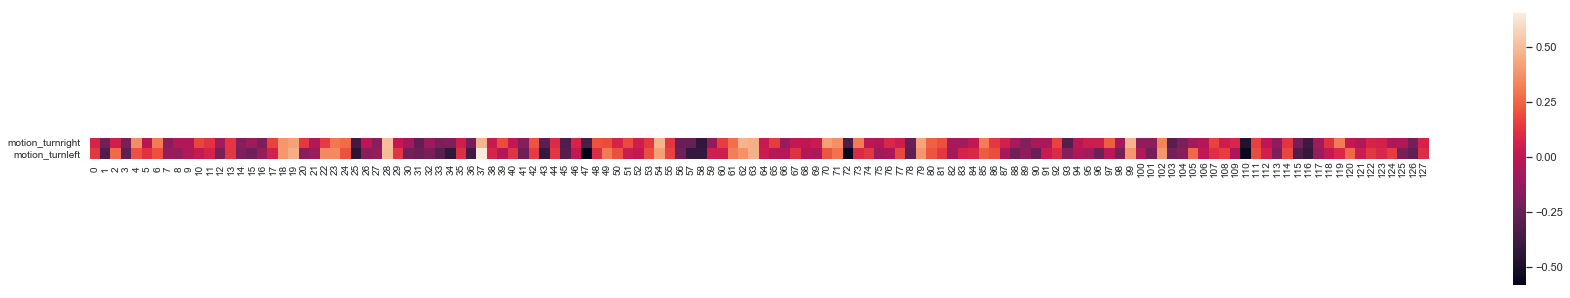

In [40]:
xticklabels=[i for i in range(128)]
fig, ax = plt.subplots(figsize=(30,5)) 
sns.heatmap(df, xticklabels=xticklabels, square=True, ax=ax)
plt.xticks(np.arange(128)+0.5, fontsize="10", va="center")
plt.yticks(np.arange(2)+0.5, rotation=0, fontsize="10", va="center")



([<matplotlib.axis.YTick at 0x163747dd8>,
 <a list of 2 Text yticklabel objects>)

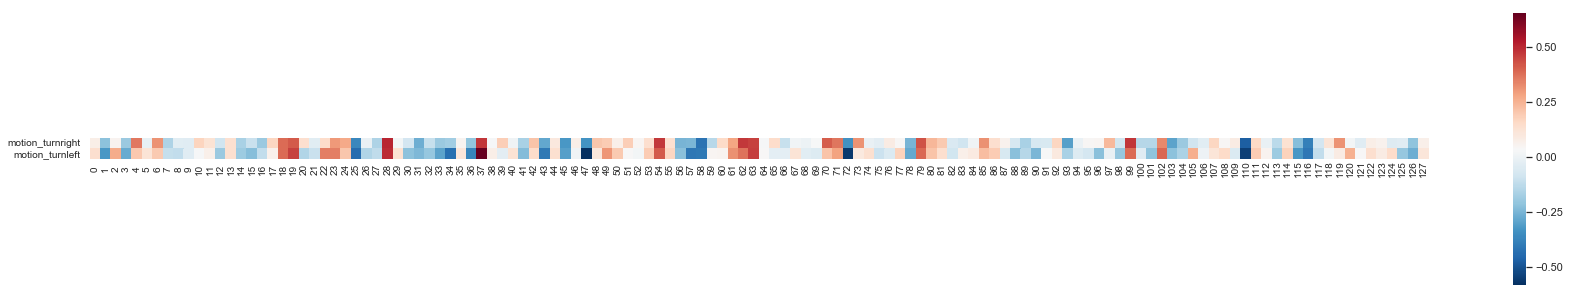

In [39]:
xticklabels=[i for i in range(128)]
fig, ax = plt.subplots(figsize=(30,5)) 
sns.heatmap(df, xticklabels=xticklabels, cmap='RdBu_r', square=True, ax=ax)
plt.xticks(np.arange(128)+0.5, fontsize="10", va="center")
plt.yticks(np.arange(2)+0.5, rotation=0, fontsize="10", va="center")


In [43]:
df = pd.DataFrame([model['motion_turnright'], model['motion_turnleft'], model['looks_changesizeby']])
df.rename(index={0: 'motion_turnright', 1:'motion_turnleft', 2: 'looks_changesizeby'}, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
motion_turnright,0.076611,-0.218992,0.059235,-0.192742,0.361851,-0.014902,0.313269,-0.155646,-0.034524,-0.040143,...,0.119581,0.316389,0.019130,-0.037409,0.075397,0.065305,-0.045256,-0.039255,-0.211956,0.073610
motion_turnleft,0.139980,-0.320858,0.267517,-0.274935,0.202414,0.123328,0.198266,-0.108742,-0.113940,-0.038744,...,0.020980,0.087309,0.257499,0.039073,0.142330,0.089703,0.151029,-0.202091,-0.267071,0.110704
looks_changesizeby,0.344100,0.318401,-0.126316,-0.096353,0.073393,0.377612,0.431553,-0.161523,0.212970,0.127558,...,0.496591,0.065775,-0.373212,-0.190448,0.125239,0.055516,-0.187647,-0.249386,0.053928,-0.111590


([<matplotlib.axis.YTick at 0x16445cb38>,
 <a list of 3 Text yticklabel objects>)

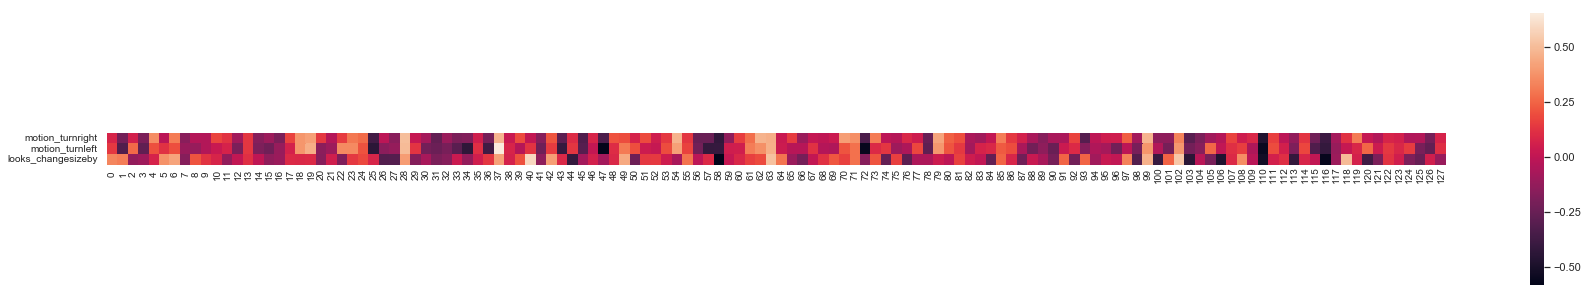

In [45]:
xticklabels=[i for i in range(128)]
fig, ax = plt.subplots(figsize=(30,5)) 
sns.heatmap(df, xticklabels=xticklabels, square=True, ax=ax)
plt.xticks(np.arange(128)+0.5, fontsize="10", va="center")
plt.yticks(np.arange(3)+0.5, rotation=0, fontsize="10", va="center")

In [ ]:
# 6-dim PCA dimensionality reduction!
